In [1]:
"""
Step 1: Load and Standardize Data

First we’ll load the data and store it in a pandas dataframe. The data set 
contains ratings from 718 users (instances) for 8,913 movies (features). 
Even though all of the features in the dataset are measured on the same scale 
(a 0 through 5 rating), we must make sure that we standardize the data by 
transforming it onto a unit scale (mean=0 and variance=1). Also, all null (NaN) 
values were converted to 0. It is necessary to transform data because PCA can 
only be applied on numerical data.
"""
#Load dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA #as sklearnPCA
import seaborn

In [2]:
#Load movie names and movie ratings

movies = pd.read_csv("C:/Users/dell/Desktop/Bouthaina/ml-20m/movies_new.csv")
ratings = pd.read_csv("C:/Users/dell/Desktop/Bouthaina/ml-20m/ratings_new.csv")
ratings.drop(['timestamp'], axis=1, inplace=True)
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]
ratings.movieId = ratings.movieId.map(replace_name)
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape
df1 = M.replace(np.nan, 0, regex=True)
X_std = StandardScaler().fit_transform(df1)

In [3]:
"""
Step 2: Covariance Matrix and Eigendecomposition

Next, a covariance matrix is created based on the standardized data. 
The covariance matrix is a representation of the covariance between each feature 
in the original dataset.

The covariance matrix can be found as follows:
"""
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.001001   -0.0014153  -0.00284407 ...  0.05465659 -0.001002
  -0.0019754 ]
 [-0.0014153   1.001001   -0.00401718 ... -0.01448667 -0.0014153
  -0.00279021]
 [-0.00284407 -0.00401718  1.001001   ...  0.03614328 -0.00284407
  -0.00560696]
 ...
 [ 0.05465659 -0.01448667  0.03614328 ...  1.001001   -0.01025622
   0.01468195]
 [-0.001002   -0.0014153  -0.00284407 ... -0.01025622  1.001001
  -0.0019754 ]
 [-0.0019754  -0.00279021 -0.00560696 ...  0.01468195 -0.0019754
   1.001001  ]]


In [4]:
"""
After the covariance matrix is generated, eigendecomposition is performed on the 
covariance matrix. Eigenvectors and eigenvalues are found as a result of the 
eigendceomposition. Each eigenvector has a corresponding eigenvalue, and the sum of 
the eigenvalues represents all of the variance within the entire dataset.

The eigendecomposition can be performed as follows:
"""
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 8.63538393e-03+0.00000000e+00j  1.53757248e-02+0.00000000e+00j
   8.94300198e-03+0.00000000e+00j ... -2.46679459e-17+0.00000000e+00j
  -1.55979653e-17-7.91780914e-18j -1.55979653e-17+7.91780914e-18j]
 [-1.67611124e-04+0.00000000e+00j  1.23936538e-03+0.00000000e+00j
  -5.13062586e-04+0.00000000e+00j ...  3.01714362e-18+0.00000000e+00j
   1.29822653e-18+1.08952776e-18j  1.29822653e-18-1.08952776e-18j]
 [ 1.89588213e-03+0.00000000e+00j  1.40811335e-03+0.00000000e+00j
  -1.34004404e-03+0.00000000e+00j ...  1.76946403e-20+0.00000000e+00j
   1.59506557e-18+2.68862208e-19j  1.59506557e-18-2.68862208e-19j]
 ...
 [ 6.66005353e-03+0.00000000e+00j  1.12127211e-02+0.00000000e+00j
  -1.30341602e-02+0.00000000e+00j ... -3.21839213e-17+0.00000000e+00j
  -2.72325662e-17-5.50324763e-18j -2.72325662e-17+5.50324763e-18j]
 [-1.13772750e-04+0.00000000e+00j -3.17856352e-04+0.00000000e+00j
   1.01523465e-03+0.00000000e+00j ...  5.71045330e-17+0.00000000e+00j
  -8.68059855e-17+6.45081319e-17j

In [5]:
"""
Step 3: Selecting Principal Components

Eigenvectors, or principal components, are a normalized linear combination of the 
features in the original dataset. The first principal component captures the most 
variance in the original variables, and the second component is a representation of 
the second highest variance within the dataset.

The eigenvectors with the lowest eigenvalues describe the least amount of variation
within the dataset. Therefore, these values can be dropped. First, lets order the 
eigenvalues in descending order:
"""
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    

Eigenvalues in descending order:
589.0998552538539
369.2021749812294
252.40353478938326
219.32334941918091
204.82732008459553
191.52692361128686
173.2631655959489
154.69897061667504
135.2142092471538
128.05677908078664
123.7659363878346
118.34218395525785
111.45806202497921
104.65999134863075
98.64921776046208
96.86197785751713
85.57811697146765
82.89283513201254
80.73065408356123
78.22135788638074
77.71161360078335
75.52773148412967
73.56803000603807
72.78733693123166
71.35629966690706
68.32338480011798
66.824270831538
66.25676819320904
64.65815152572787
62.886772367555594
62.43552496723883
61.80876123086895
60.173712322180315
59.870957221180895
59.24091852803747
57.66146957280367
56.83816672536765
56.19280696423517
54.50848828212516
53.44012044702182
52.439947404266526
50.71485608554466
50.25299446547824
49.30294281819972
49.10976399295754
48.070569561475004
47.45435487854182
47.20080119228454
46.14360586832739
45.35542029589472
44.859790650079745
44.08542017588319
42.98283745202772


3.9867016638644523
4.033053428165219
4.021617280727394
4.005376802359264
4.00870618432829
3.878494501672248
3.8042573772021258
3.8563067382275937
3.849663027755964
3.833165640568349
3.820935930651099
3.678849178970223
3.68864670848668
3.6995601248369163
3.7165217412801925
3.726484659849151
3.810964768147951
3.741608408233229
3.752371005890943
3.784770281729281
3.780059233039845
3.7716613626916318
3.760359271916986
3.648799473591266
3.6340874666593352
3.628153621624211
3.630197847829346
3.607675840993134
3.5960372399334335
3.5082975547934447
3.5145432561401275
3.5221101839012867
3.545171077189486
3.5779543770113196
3.5597108070324146
3.5721625676196185
3.5663418966452674
3.3274731046054504
3.355124811952824
3.3611846799942393
3.3790587797732075
3.386146813645808
3.396485984745574
3.4043896065291697
3.440684212961715
3.4150559757998895
3.421037970341092
3.455128519265577
3.4633344100414742
3.477210609381101
3.4898231050935276
3.496004757874569
3.5130544555080054
3.241187088864549
3.24548

3.703559944641376e-14
3.637733266202084e-14
3.637733266202084e-14
3.665318662559245e-14
3.665318662559245e-14
3.6203579932813006e-14
3.6203579932813006e-14
3.624498689927744e-14
3.624498689927744e-14
3.728630972710216e-14
3.7214268088433385e-14
3.6518416274946614e-14
3.6518416274946614e-14
3.5874814346177756e-14
3.5874814346177756e-14
3.677234170705037e-14
3.656655102045298e-14
3.684500040908481e-14
3.7259613370717645e-14
3.7259613370717645e-14
3.669859680372765e-14
3.669859680372765e-14
3.6338077813390616e-14
3.6338077813390616e-14
3.611176428447085e-14
3.611176428447085e-14
3.740879394548054e-14
3.740879394548054e-14
3.7340723032010736e-14
3.7340723032010736e-14
3.726497500818639e-14
3.643186094502904e-14
3.643186094502904e-14
3.624749905981034e-14
3.624749905981034e-14
3.664439043364535e-14
3.664439043364535e-14
3.696224731754528e-14
3.6733553495594583e-14
3.6581845417208e-14
2.5843785086391058e-14
2.5843785086391058e-14
2.3004103336932318e-14
2.3004103336932318e-14
2.59738662162037

1.9644135199976747e-14
2.1239321706332668e-14
2.1239321706332668e-14
2.053472071092592e-14
2.053472071092592e-14
2.2260763348396575e-14
2.2260763348396575e-14
2.2674785269992396e-14
2.2674785269992396e-14
2.180302943369589e-14
2.180302943369589e-14
2.2308608973570215e-14
2.2308608973570215e-14
2.3063733623016962e-14
2.3063733623016962e-14
2.0887796733149622e-14
2.0887796733149622e-14
2.266784003415788e-14
2.266784003415788e-14
2.2454991218583643e-14
2.2454991218583643e-14
2.311721266060696e-14
2.311721266060696e-14
2.1352436235380877e-14
2.1352436235380877e-14
2.2591859290358755e-14
2.2591859290358755e-14
2.2862459194905557e-14
2.2862459194905557e-14
2.128460544988231e-14
2.128460544988231e-14
2.2264156288730877e-14
2.2264156288730877e-14
2.293340433055079e-14
2.293340433055079e-14
2.340633873209016e-14
2.340633873209016e-14
2.302460746893593e-14
2.302460746893593e-14
2.2004795061859524e-14
2.2004795061859524e-14
2.245602085593006e-14
2.245602085593006e-14
2.3143910558126997e-14
2.3143

1.3141054596560073e-14
1.3141054596560073e-14
1.3388093036026417e-14
1.3388093036026417e-14
1.3828731435701482e-14
1.3828731435701482e-14
1.3697055803084763e-14
1.3697055803084763e-14
1.3852310924621565e-14
1.3852310924621565e-14
1.3887408328248966e-14
1.3887408328248966e-14
1.4076732097747397e-14
1.4076732097747397e-14
1.3968996453178946e-14
1.3968996453178946e-14
1.4097006210953998e-14
1.4097006210953998e-14
1.4178381567112246e-14
1.4178381567112246e-14
1.4105833333217835e-14
1.4192007195148597e-14
1.4192007195148597e-14
1.4300437231849754e-14
1.4300437231849754e-14
1.4193947089190569e-14
1.4193947089190569e-14
1.4247914433040507e-14
1.4247914433040507e-14
1.4300631137226163e-14
5.9579840695920594e-15
5.9579840695920594e-15
5.717166091173019e-15
5.717166091173019e-15
8.622704871608477e-15
8.622704871608477e-15
8.632720780811613e-15
8.632720780811613e-15
9.793380068066307e-15
9.793380068066307e-15
9.36333852572741e-15
9.36333852572741e-15
1.0363752459568623e-14
1.0363752459568623e-14


1.0100362440492571e-14
9.366839302479693e-15
9.366839302479693e-15
1.0047114501254855e-14
1.0047114501254855e-14
9.772248139350161e-15
9.772248139350161e-15
9.590868845166012e-15
9.590868845166012e-15
9.44393995333559e-15
8.470289359414901e-15
8.470289359414901e-15
8.704334410365628e-15
8.704334410365628e-15
9.493535534965431e-15
9.493535534965431e-15
9.810419066122952e-15
9.810419066122952e-15
9.137470716203289e-15
9.137470716203289e-15
9.262838086438904e-15
9.262838086438904e-15
9.3888428235027e-15
9.653368641801499e-15
9.653368641801499e-15
9.95025697571767e-15
9.95025697571767e-15
8.924364801205434e-15
8.924364801205434e-15
9.197189747398957e-15
9.197189747398957e-15
9.05310948034721e-15
9.05310948034721e-15
9.070979109194838e-15
9.070979109194838e-15
8.43198035295907e-15
8.43198035295907e-15
8.92452290124936e-15
8.92452290124936e-15
9.129466190843166e-15
9.129466190843166e-15
9.318509127123548e-15
9.318509127123548e-15
9.74369024759507e-15
9.74369024759507e-15
9.780907740282912e-1

4.824177765478113e-15
4.183948581160824e-15
4.183948581160824e-15
4.079306170515003e-15
4.079306170515003e-15
4.4733301175525184e-15
4.4733301175525184e-15
4.978767945898145e-15
4.978767945898145e-15
4.824870015095316e-15
4.824870015095316e-15
5.003871459041351e-15
5.003871459041351e-15
5.041019703986e-15
5.041019703986e-15
5.120420433366907e-15
5.120420433366907e-15
5.0867324206552784e-15
5.0867324206552784e-15
5.0095819810717094e-15
5.0095819810717094e-15
5.126357056888089e-15
5.126357056888089e-15
5.1214095134645775e-15
5.1214095134645775e-15
2.156511116662978e-15
2.156511116662978e-15
2.651859924059101e-15
2.651859924059101e-15
2.3308776873846703e-15
2.3308776873846703e-15
2.156999678702854e-15
2.156999678702854e-15
2.331134552739401e-15
2.331134552739401e-15
1.8480250368234854e-15
1.8480250368234854e-15
3.5140355745815833e-15
3.5140355745815833e-15
2.6342611845800023e-15
2.6342611845800023e-15
1.921623238944531e-15
1.921623238944531e-15
3.692380559876449e-15
3.692380559876449e-15


4.1781366589651753e-29
4.060770301200209e-29
4.060770301200209e-29
4.066474779747865e-29
4.066474779747865e-29
4.093387791351341e-29
4.093387791351341e-29
4.1065159226352325e-29
4.1065159226352325e-29
4.041192096917896e-29
4.041192096917896e-29
4.0355754566669965e-29
4.0355754566669965e-29
4.025910411182592e-29
4.025910411182592e-29
4.0368014712771076e-29
4.0368014712771076e-29
4.01415663206578e-29
4.01415663206578e-29
3.9779584099009265e-29
3.9779584099009265e-29
3.856785796496691e-29
3.856785796496691e-29
3.94165335278554e-29
3.94165335278554e-29
3.8401742488287073e-29
3.8401742488287073e-29
3.8854418716929924e-29
3.8854418716929924e-29
3.882236653873568e-29
3.882236653873568e-29
3.820280580822563e-29
3.820280580822563e-29
3.9518195989977686e-29
3.9518195989977686e-29
3.8640632051804155e-29
3.8640632051804155e-29
3.8629982211414593e-29
3.8629982211414593e-29
3.8579716096607285e-29
3.8579716096607285e-29
3.8968645686501964e-29
3.8968645686501964e-29
3.8717999519643685e-29
3.8717999519

In [6]:
"""
To get a better idea of how principal components describe the variance in the data, 
we will look at the explained variance ratio of the first principal components.
"""    
pca = PCA(n_components=100)
principalComponents =pca.fit_transform(df1)
print(pca.explained_variance_ratio_ ) 

[0.09082172 0.04267138 0.03043372 0.02060809 0.01715567 0.01577163
 0.01339869 0.01208983 0.01028327 0.00830868 0.00762059 0.00741388
 0.00711023 0.00634777 0.00605475 0.00591184 0.00539833 0.00525349
 0.00491324 0.00464939 0.00452038 0.00442031 0.00439042 0.00412929
 0.00399431 0.0039657  0.00384748 0.00375272 0.00372418 0.00364087
 0.00354198 0.0034353  0.00333372 0.00332176 0.00328032 0.00317574
 0.00314818 0.00308708 0.00299965 0.00297307 0.00294342 0.00290651
 0.00287139 0.00285742 0.00280933 0.00279818 0.00274947 0.00271078
 0.00267856 0.00264854 0.00260911 0.00259893 0.00256141 0.00252349
 0.00250408 0.00248277 0.00245709 0.00245119 0.00242381 0.00240376
 0.00238584 0.0023676  0.00233949 0.0023193  0.00230747 0.00227479
 0.00225227 0.00222122 0.00221689 0.00219458 0.00213375 0.00212323
 0.00211924 0.00209747 0.00206928 0.00204808 0.0020332  0.00202308
 0.00200703 0.00198467 0.00195684 0.00194245 0.00192556 0.00191044
 0.00190752 0.00189218 0.00187507 0.0018568  0.00184026 0.0018

In [7]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-15.064956,0.225027,-0.849885,0.531575,-3.895149,-6.516874,5.468049,2.259797,-3.211810,1.567546,...,-0.117326,0.988169,-1.499516,0.057572,-2.038671,-0.604778,-0.835155,1.670315,-0.979307,-0.443105
1,-1.326663,-7.464371,-7.568885,7.476936,5.859967,-3.456359,4.000358,1.596733,0.474402,2.031386,...,0.255494,-1.191271,0.390874,-3.629453,1.833970,3.108436,-0.416757,-2.673634,0.865609,1.262134
2,-6.241268,-6.985246,-4.179438,8.222505,11.371662,-0.946565,6.682548,0.488367,8.429236,2.804372,...,-0.086004,-0.487795,-1.134013,1.348960,-2.959160,-2.936094,2.983549,6.367372,2.160291,2.468089
3,38.273532,-7.509102,-6.831888,-8.952714,0.387554,9.136509,-13.103585,0.074380,0.690870,-3.065536,...,1.795717,1.016023,1.969896,-0.525067,2.518883,-3.712010,-0.332194,1.470672,-1.922191,2.581720
4,-7.816298,-5.977954,1.074704,1.750719,14.796604,8.906457,-1.269308,-7.134762,-0.440771,-2.326034,...,-0.368387,0.228342,-2.289466,-0.227354,2.833275,1.819162,-1.098347,-0.771576,-1.195798,-4.309533


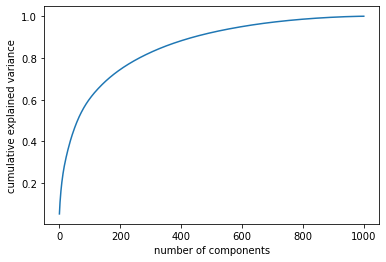

In [8]:
#Explained variance
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [10]:
import numpy as np
from sklearn.decomposition import IncrementalPCA
X = df1.to_numpy()
ipca = IncrementalPCA(n_components=500, batch_size=500)
ipca.fit(X)

principalComponents = ipca.transform(X)
principalDf = pd.DataFrame(data = principalComponents)
print(principalDf)

C:\Users\dell\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\decomposition\_incremental_pca.py:313: RuntimeWarning: Mean of empty slice.
  explained_variance[self.n_components_:].mean()
C:\Users\dell\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


           0         1          2         3          4         5          6    \
0   -15.064956 -0.225026   0.849883 -0.531562   3.895153  6.516883  -5.468076   
1    -1.326663  7.464372   7.568885 -7.476914  -5.859968  3.456326  -4.000431   
2    -6.241268  6.985246   4.179443 -8.222517 -11.371622  0.946619  -6.682755   
3    38.273532  7.509102   6.831873  8.952628  -0.387245 -9.136355  13.103196   
4    -7.816298  5.977953  -1.074710 -1.750711 -14.796639 -8.906297   1.269566   
..         ...       ...        ...       ...        ...       ...        ...   
995   0.595611 -6.453081 -22.166134  3.007029  10.617998  0.873235  -2.697841   
996  14.349209  8.033102   8.121576 -1.075117  -1.897012  7.937518  11.079504   
997 -13.193174 -2.177437   6.683395  9.359581  -5.502166 -5.966290  -6.757554   
998  -6.535498  1.857571  -9.864816  2.043129  -2.632912  2.684996   2.917131   
999   2.252137  7.515170   3.776448  7.853184  -0.835375 -1.200961  14.198181   

          7         8      

In [44]:
#principalDf.to_csv('C:/Users/dell/Desktop/Bouthaina/ml-20m/after_pca1.csv', index = False)

In [11]:
principalDf.index = df1.index
print(principalDf)
principalDf.to_csv('C:/Users/dell/Desktop/Bouthaina/Mémoire/after_pca500.csv')
#print(df1.index)

              0         1          2         3          4         5    \
userId                                                                  
70     -15.064956 -0.225026   0.849883 -0.531562   3.895153  6.516883   
131     -1.326663  7.464372   7.568885 -7.476914  -5.859968  3.456326   
206     -6.241268  6.985246   4.179443 -8.222517 -11.371622  0.946619   
294     38.273532  7.509102   6.831873  8.952628  -0.387245 -9.136355   
466     -7.816298  5.977953  -1.074710 -1.750711 -14.796639 -8.906297   
...           ...       ...        ...       ...        ...       ...   
137502   0.595611 -6.453081 -22.166134  3.007029  10.617998  0.873235   
137649  14.349209  8.033102   8.121576 -1.075117  -1.897012  7.937518   
137907 -13.193174 -2.177437   6.683395  9.359581  -5.502166 -5.966290   
137923  -6.535498  1.857571  -9.864816  2.043129  -2.632912  2.684996   
138173   2.252137  7.515170   3.776448  7.853184  -0.835375 -1.200961   

              6         7         8          9    